# AI Lab KIIT-CSE

Lab-01

Author: Aniruddha Mukherjee

In [9]:
print("Roll Number: 2205533")


Roll Number: 2205533


In [14]:
!pip install networkx


# Lab-01:: Simple BFS and DFS

## Define the Graph


Adjacency Matrix as DataFrame:
   0  1  2  3  4  5  6
0  0  1  1  0  0  0  0
1  1  0  0  1  1  0  0
2  1  0  0  0  0  1  1
3  0  1  0  0  0  0  0
4  0  1  0  0  0  0  0
5  0  0  1  0  0  0  0
6  0  0  1  0  0  0  0


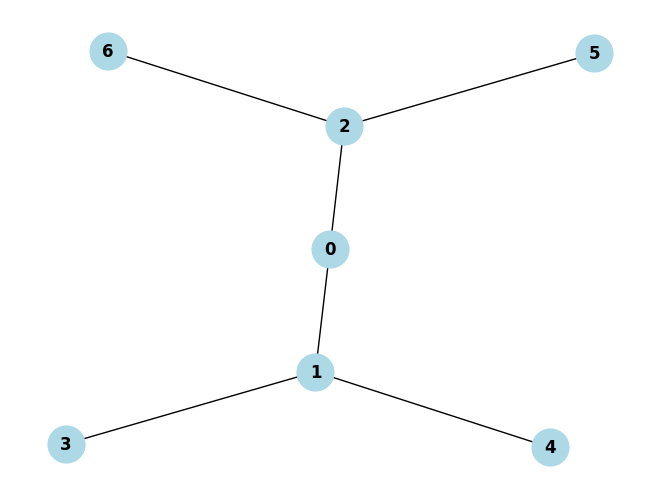

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Function to build a graph from an adjacency matrix
def build_graph_from_adjacency_matrix(matrix):
    G = nx.Graph()
    num_nodes = len(matrix)  # Number of nodes in the graph

    # Iterate over the adjacency matrix to add edges
    for i in range(num_nodes):
        for j in range(num_nodes):
            if matrix[i][j] == 1:  # Check if there is an edge
                G.add_edge(i, j)
    return G

# Example 2D adjacency matrix
adj_matrix = [
    [0, 1, 1, 0, 0, 0, 0],  # Node 0 is connected to nodes 1 and 2
    [1, 0, 0, 1, 1, 0, 0],  # Node 1 is connected to nodes 0, 3, and 4
    [1, 0, 0, 0, 0, 1, 1],  # Node 2 is connected to nodes 0, 5, and 6
    [0, 1, 0, 0, 0, 0, 0],  # Node 3 is connected to node 1
    [0, 1, 0, 0, 0, 0, 0],  # Node 4 is connected to node 1
    [0, 0, 1, 0, 0, 0, 0],  # Node 5 is connected to node 2
    [0, 0, 1, 0, 0, 0, 0],  # Node 6 is connected to node 2
]

# Build the graph from the adjacency matrix
g = build_graph_from_adjacency_matrix(adj_matrix)

# Display the adjacency matrix using pandas (optional)

print("\nAdjacency Matrix as DataFrame:")
print(pd.DataFrame(adj_matrix))

# Draw the graph with labels
nx.draw(g, with_labels=True, node_color="lightblue", node_size=700, font_weight="bold")

# Save the graph visualization as an image
plt.savefig("graph.png")
plt.show()


## BFS

Input: Adj Matrix

Output: Traversal

In [35]:
from collections import deque


def bfs(adj, s):


    q = deque() # create a queue

    # Initially mark all the vertices as not visited
    # When we push a vertex into the q, we mark it as
    # visited
    visited = [False] * len(adj);

    # Mark the source node as visited and add it to the queue
    visited[s] = True
    q.append(s)

    # Iterate over the queue
    while q:

        # Dequeue a vertex from queue and print it
        curr = q.popleft()
        print(curr, end=" ")

        # Get all adjacent vertices of the dequeued
        # vertex. If an adjacent has not been visited,
        # mark it visited and enqueue it
        for x in adj[curr]:
            if not visited[x]:
                visited[x] = True
                q.append(x)

# Function to add an edge to the graph
def add_edge(adj, u, v):
    adj[u].append(v)
    adj[v].append(u)



In [36]:
# Function to build an adjacency list from an adjacency matrix
def build_adjacency_list_from_matrix(matrix):
    adj_list = [[] for _ in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                adj_list[i].append(j)
    return adj_list



# Example 2D adjacency matrix
adj_matrix = [
    [0, 1, 1, 0, 0, 0, 0],  # Node 0 is connected to nodes 1 and 2
    [1, 0, 0, 1, 1, 0, 0],  # Node 1 is connected to nodes 0, 3, and 4
    [1, 0, 0, 0, 0, 1, 1],  # Node 2 is connected to nodes 0, 5, and 6
    [0, 1, 0, 0, 0, 0, 0],  # Node 3 is connected to node 1
    [0, 1, 0, 0, 0, 0, 0],  # Node 4 is connected to node 1
    [0, 0, 1, 0, 0, 0, 0],  # Node 5 is connected to node 2
    [0, 0, 1, 0, 0, 0, 0],  # Node 6 is connected to node 2
]

# Build adjacency list from the matrix
adj = build_adjacency_list_from_matrix(adj_matrix)

# Print the adjacency list for reference
print("\nGraph Adjacency List:")
for i, neighbors in enumerate(adj):
    print(f"{i}: {neighbors}")

# Perform BFS starting from vertex 0
print("\nBFS Traversal starting from vertex 0:")
bfs(adj, 0)



Graph Adjacency List:
0: [1, 2]
1: [0, 3, 4]
2: [0, 5, 6]
3: [1]
4: [1]
5: [2]
6: [2]

BFS Traversal starting from vertex 0:
0 1 2 3 4 5 6 

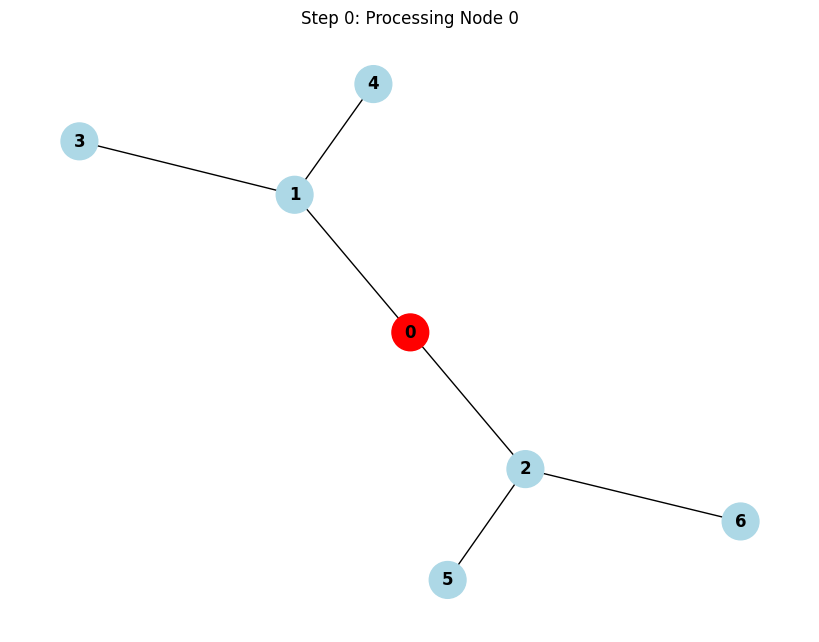

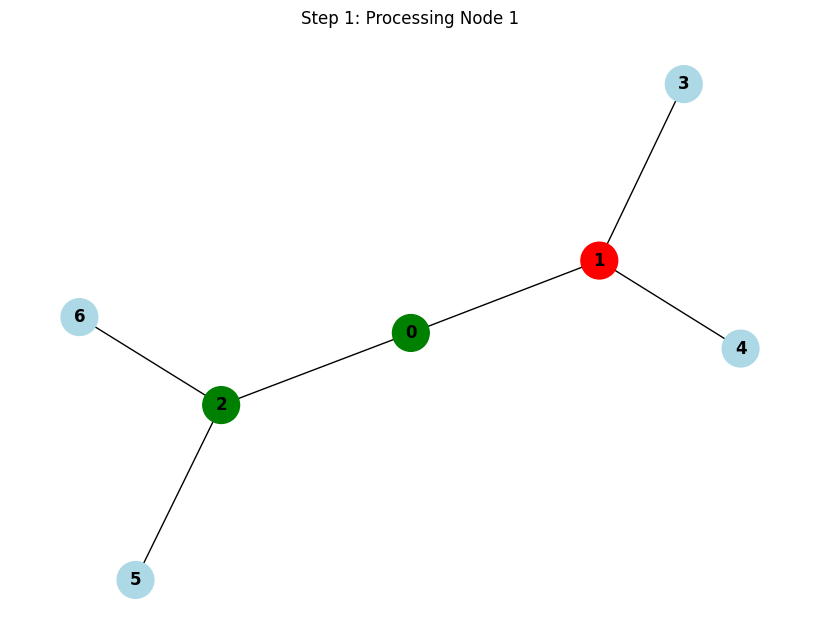

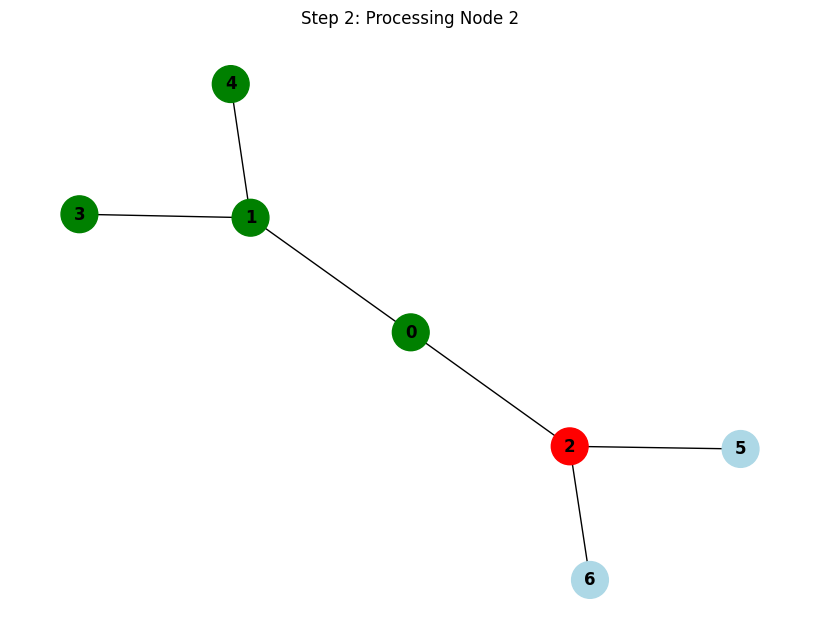

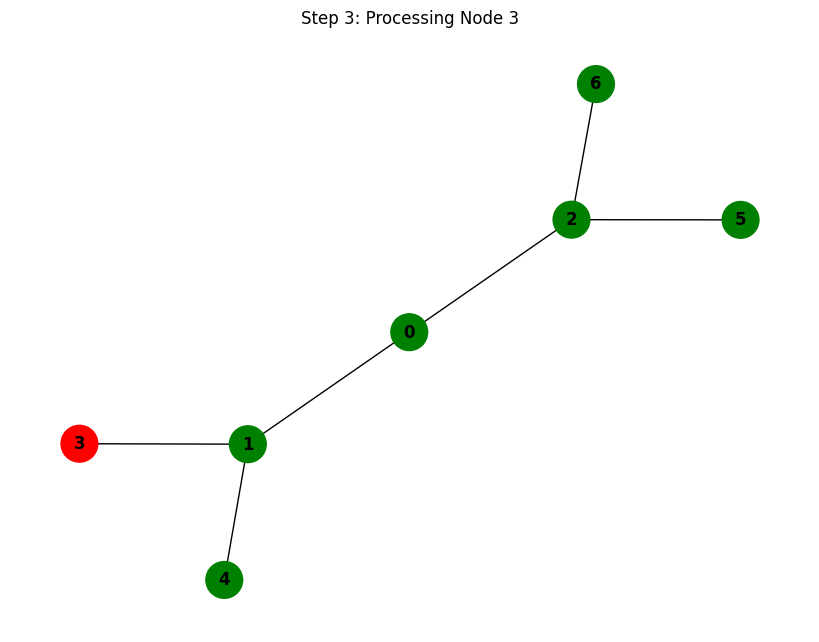

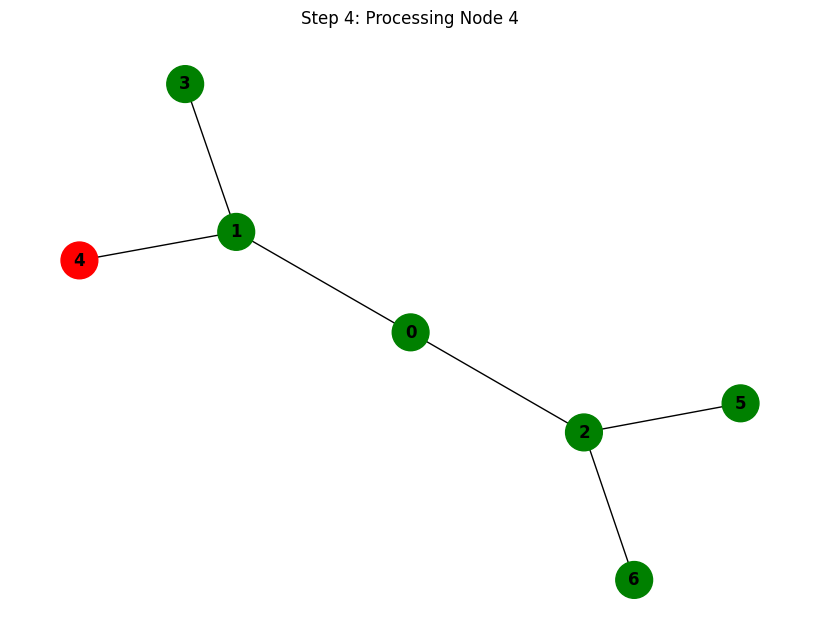

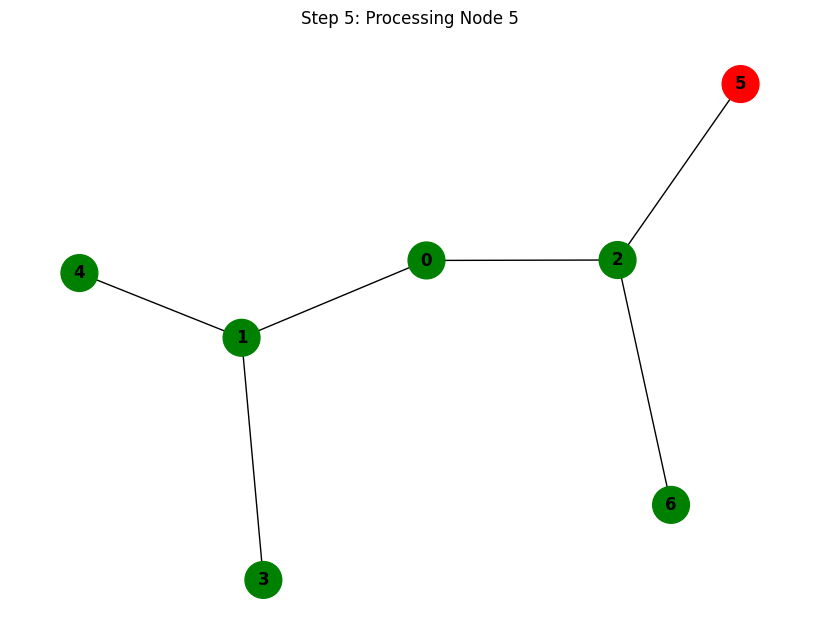

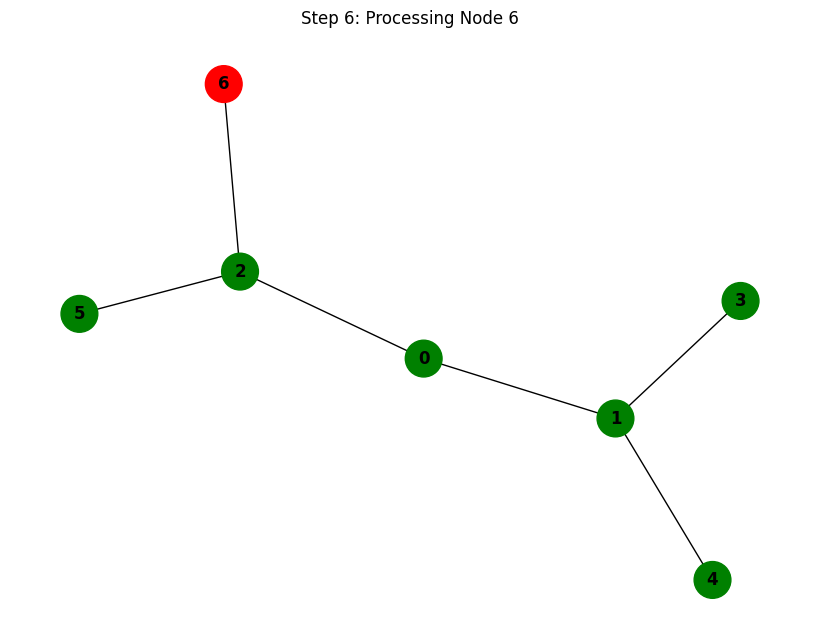

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Function to perform BFS and visualize each step
def bfs_visualize(graph, start_node):
    visited = [False] * len(graph)  # Track visited nodes
    queue = deque([start_node])  # Initialize the queue with the start node
    visited[start_node] = True

    # Create a NetworkX graph for visualization
    G = nx.Graph()

    # Add edges to the NetworkX graph
    for u in range(len(graph)):
        for v in graph[u]:
            G.add_edge(u, v)

    step = 0  # To keep track of the step number

    while queue:
        # Dequeue a vertex from the queue
        current_node = queue.popleft()

        # Plot the current state of the graph
        plt.figure(figsize=(8, 6))
        color_map = ["lightblue" if not visited[i] else "green" for i in range(len(graph))]
        color_map[current_node] = "red"  # Highlight the current node being processed

        # Draw the graph with the current state
        nx.draw(
            G,
            with_labels=True,
            node_color=color_map,
            node_size=700,
            font_weight="bold",
        )
        plt.title(f"Step {step}: Processing Node {current_node}")
        plt.savefig(f"bfs_step_{step}.png")  # Save the step as an image
        plt.show()

        # Process all neighbors of the current node
        for neighbor in graph[current_node]:
            if not visited[neighbor]:
                visited[neighbor] = True
                queue.append(neighbor)

        step += 1


# Perform BFS visualization starting from vertex 0
bfs_visualize(adj, 0)


## DFS

Depth First Search

In [38]:
def dfs(adj, s):
    # Stack to store the nodes
    stack = []

    # Initially mark all the vertices as not visited
    visited = [False] * len(adj)

    # Mark the source node as visited and add it to the stack
    visited[s] = True
    stack.append(s)

    # Iterate while the stack is not empty
    while stack:
        # Pop a vertex from the stack and print it
        curr = stack.pop()
        print(curr, end=" ")

        # Get all adjacent vertices of the popped vertex
        # If an adjacent vertex has not been visited,
        # mark it visited and push it onto the stack
        for x in reversed(adj[curr]):  # Reverse to maintain consistent order with recursion
            if not visited[x]:
                visited[x] = True
                stack.append(x)

# Function to add an edge to the graph
def add_edge(adj, u, v):
    adj[u].append(v)
    adj[v].append(u)


In [39]:
# Example adjacency matrix
adj_matrix = [
    [0, 1, 1, 0, 0, 0, 0],  # Node 0 is connected to nodes 1 and 2
    [1, 0, 0, 1, 1, 0, 0],  # Node 1 is connected to nodes 0, 3, and 4
    [1, 0, 0, 0, 0, 1, 1],  # Node 2 is connected to nodes 0, 5, and 6
    [0, 1, 0, 0, 0, 0, 0],  # Node 3 is connected to node 1
    [0, 1, 0, 0, 0, 0, 0],  # Node 4 is connected to node 1
    [0, 0, 1, 0, 0, 0, 0],  # Node 5 is connected to node 2
    [0, 0, 1, 0, 0, 0, 0],  # Node 6 is connected to node 2
]

# Build adjacency list from the matrix
adj = build_adjacency_list_from_matrix(adj_matrix)

# Print the adjacency list for reference
print("\nGraph Adjacency List:")
for i, neighbors in enumerate(adj):
    print(f"{i}: {neighbors}")

# Perform DFS starting from vertex 0
print("\nDFS Traversal starting from vertex 0:")
dfs(adj, 0)



Graph Adjacency List:
0: [1, 2]
1: [0, 3, 4]
2: [0, 5, 6]
3: [1]
4: [1]
5: [2]
6: [2]

DFS Traversal starting from vertex 0:
0 1 3 4 2 5 6 

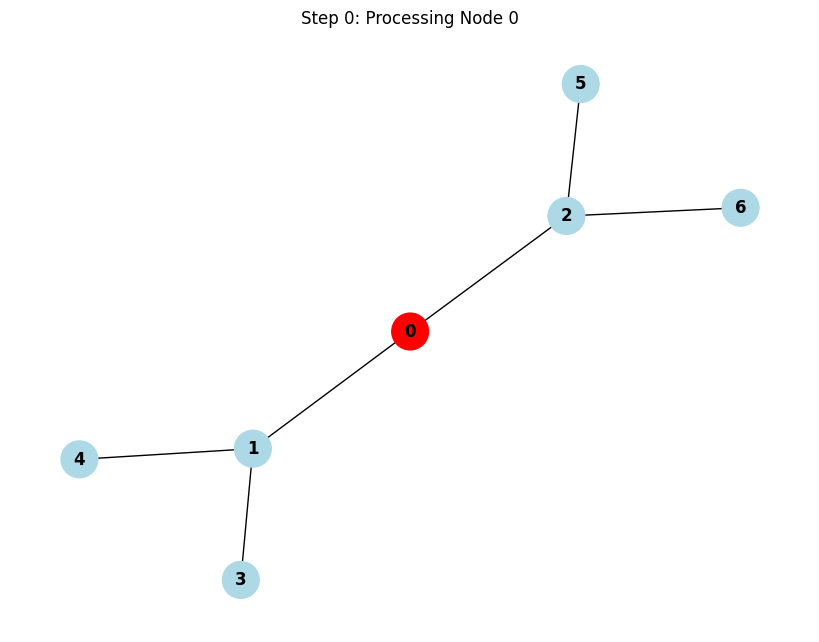

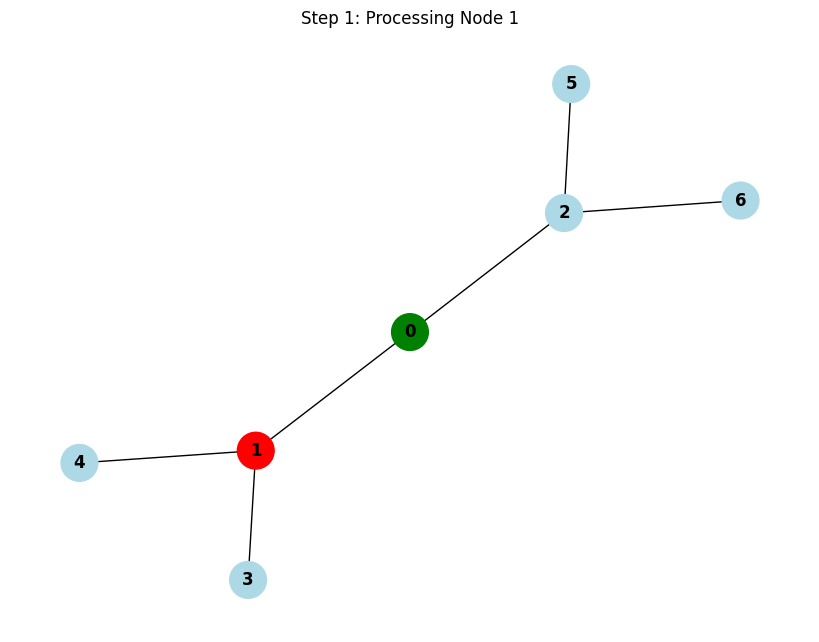

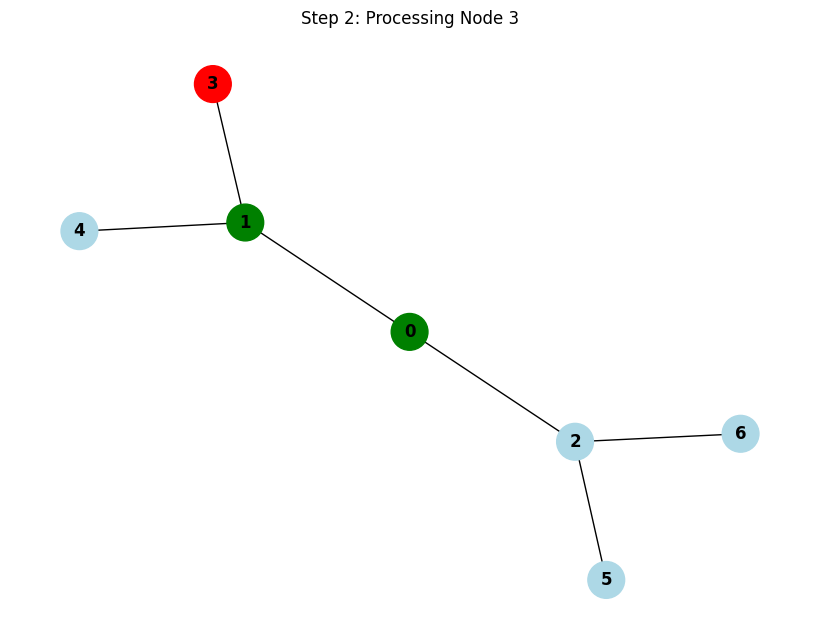

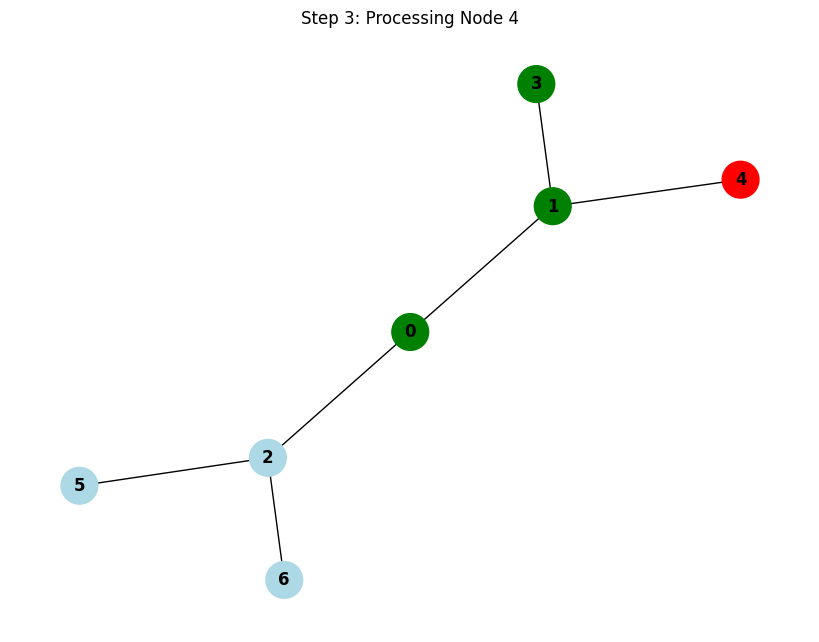

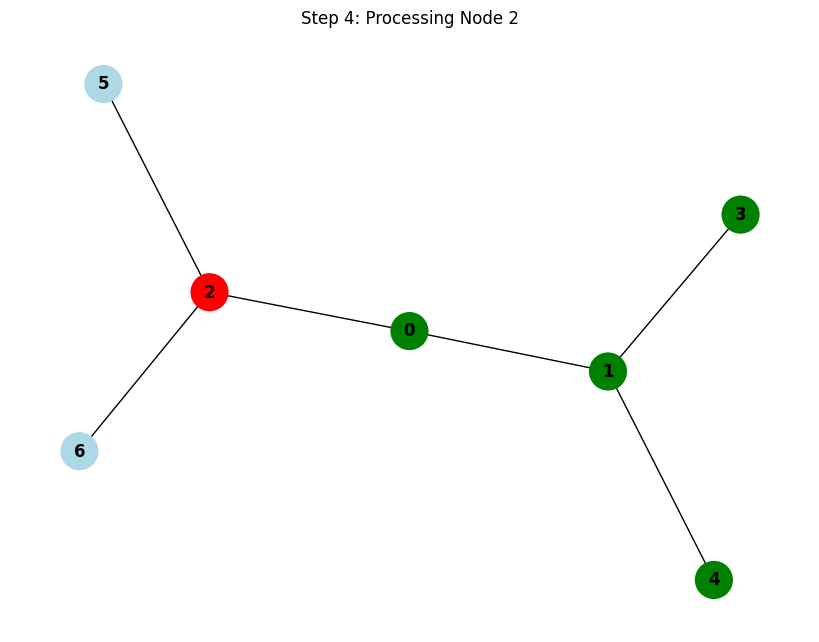

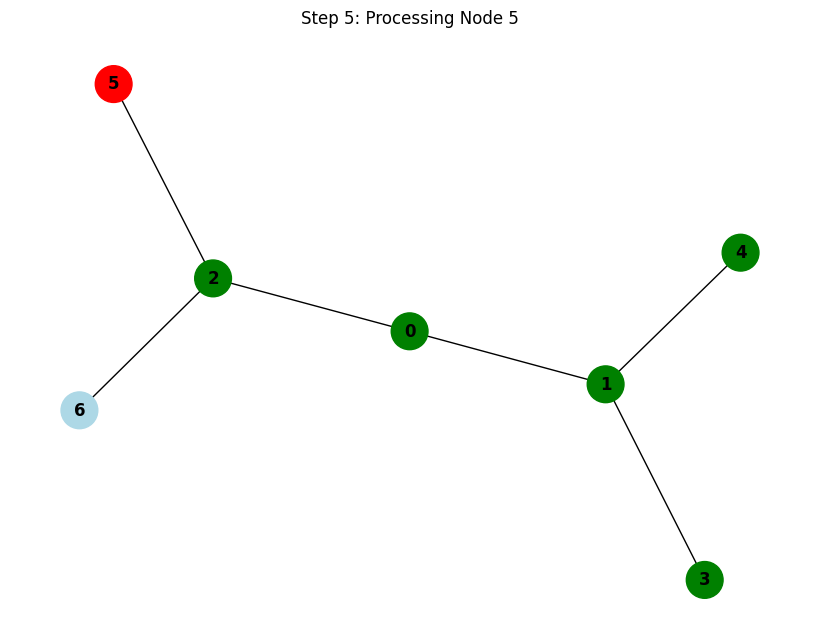

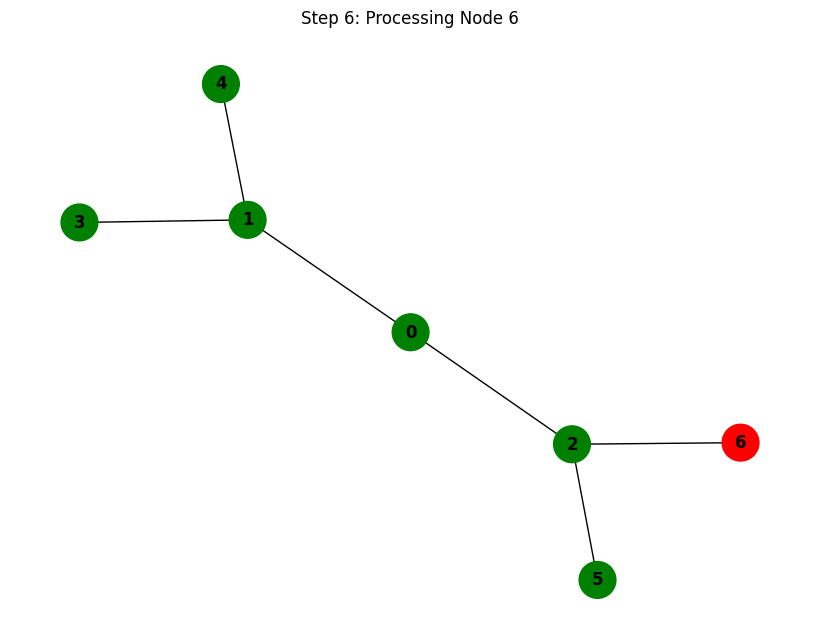

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to visualize DFS
def dfs_visualize(graph, start_node):
    stack = [start_node]  # Stack for DFS
    visited = [False] * len(graph)  # Track visited nodes

    # Create a NetworkX graph for visualization
    G = nx.Graph()

    # Add edges to the NetworkX graph
    for u in range(len(graph)):
        for v in graph[u]:
            G.add_edge(u, v)

    step = 0  # Track step number

    while stack:
        # Pop a node from the stack
        current_node = stack.pop()

        if visited[current_node]:
            continue  # Skip already visited nodes

        visited[current_node] = True  # Mark the current node as visited

        # Plot the current state of the graph
        plt.figure(figsize=(8, 6))
        color_map = ["lightblue" if not visited[i] else "green" for i in range(len(graph))]
        color_map[current_node] = "red"  # Highlight the current node being processed

        # Draw the graph with the current state
        nx.draw(
            G,
            with_labels=True,
            node_color=color_map,
            node_size=700,
            font_weight="bold",
        )
        plt.title(f"Step {step}: Processing Node {current_node}")
        plt.savefig(f"dfs_step_{step}.png")  # Save the step as an image
        plt.show()

        # Process all adjacent vertices (reversed for consistent order)
        for neighbor in reversed(graph[current_node]):
            if not visited[neighbor]:
                stack.append(neighbor)

        step += 1

# Add an edge to the adjacency list
def add_edge(adj, u, v):
    adj[u].append(v)
    adj[v].append(u)

# Perform DFS visualization starting from vertex 0
dfs_visualize(adj, 0)


# Lab 02:: Input the number of Nodes and the Start Node and End-Node, then do BFS & DFS

In [41]:
print("Hello")


Hello


In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import deque
import time


In [44]:
def generate_connected_graph(num_nodes):
    # Initialize adjacency matrix with zeros
    adj_matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    
    # First, ensure all nodes are connected (create a path 0-1-2-...-n)
    for i in range(num_nodes - 1):
        adj_matrix[i][i + 1] = 1
        adj_matrix[i + 1][i] = 1
    
    # Add random additional edges
    for i in range(num_nodes):
        for j in range(i + 2, num_nodes):  # Start from i+2 to avoid duplicating existing edges
            if random.random() < 0.3:  # 30% chance of additional edge
                adj_matrix[i][j] = 1
                adj_matrix[j][i] = 1
    
    return adj_matrix



def verify_connectivity(adj_matrix):
    """Verify that all nodes are connected using BFS"""
    num_nodes = len(adj_matrix)
    visited = [False] * num_nodes
    queue = deque([0])  # Start from node 0
    visited[0] = True
    count = 1  # Count of visited nodes
    
    while queue:
        current = queue.popleft()
        for neighbor in range(num_nodes):
            if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                queue.append(neighbor)
                count += 1
    
    return count == num_nodes


# def create_networkx_graph(adj_matrix):
#     G = nx.Graph()
#     for i, row in enumerate(adj_matrix):
#         for j, value in enumerate(row):
#             if value == 1:
#                 G.add_edge(i, j)
#     return G

# def visualize_graph(G, title, pos, path=None):
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
    
#     if path:
#         # Highlight the path
#         edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
#         nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)
    
#     plt.title(title)
#     plt.show()



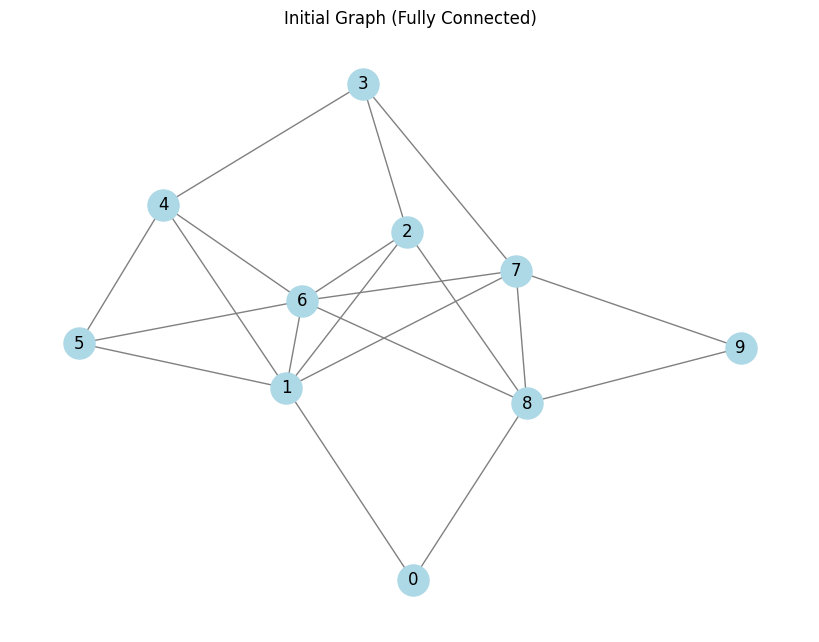


Generated Adjacency Matrix:
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]

Performing BFS...


TypeError: bfs() takes 2 positional arguments but 5 were given

In [45]:
def main():

    num_nodes = int(input("Enter the number of nodes: "))
    start_node = int(input(f"Enter the start node (0-{num_nodes-1}): "))
    end_node = int(input(f"Enter the end node (0-{num_nodes-1}): "))
    
    # Generate connected graph
    adj_matrix = generate_connected_graph(num_nodes)
    
    # Verify connectivity
    assert verify_connectivity(adj_matrix), "Graph is not fully connected!"
    
    # Create NetworkX graph
    G = create_networkx_graph(adj_matrix)
    pos = nx.spring_layout(G)  # Store layout to keep it consistent
    
    # Visualize initial graph
    visualize_graph(G, 'Initial Graph (Fully Connected)', pos)
    
    
    # Print the adjacency matrix
    
    print("\nGenerated Adjacency Matrix:")
    for row in adj_matrix:
        print(row)
    
    # Find and visualize BFS path
    print("\nPerforming BFS...")
    bfs_path = bfs(G, adj_matrix, start_node, end_node, pos)

    # bfs_path = bfs(adj_matrix, start_node, end_node)

    if bfs_path:
        visualize_graph(G, 'Final BFS Path', pos, path=bfs_path)
        print("BFS Path:", ' -> '.join(map(str, bfs_path)))
    else:
        print("No BFS path found")
    
        
    # Find and visualize DFS path
    print("\nPerforming DFS...")
    dfs_path = dfs(G, adj_matrix, start_node, end_node, pos)
    # dfs_path = dfs(adj_matrix, start_node, end_node)


    if dfs_path:
        visualize_graph(G, 'Final DFS Path', pos, path=dfs_path)
        print("DFS Path:", ' -> '.join(map(str, dfs_path)))
    else:
        print("No DFS path found")




if __name__ == '__main__':
    main()


NameError: name 'create_networkx_graph' is not defined

# Maze Solving Problem

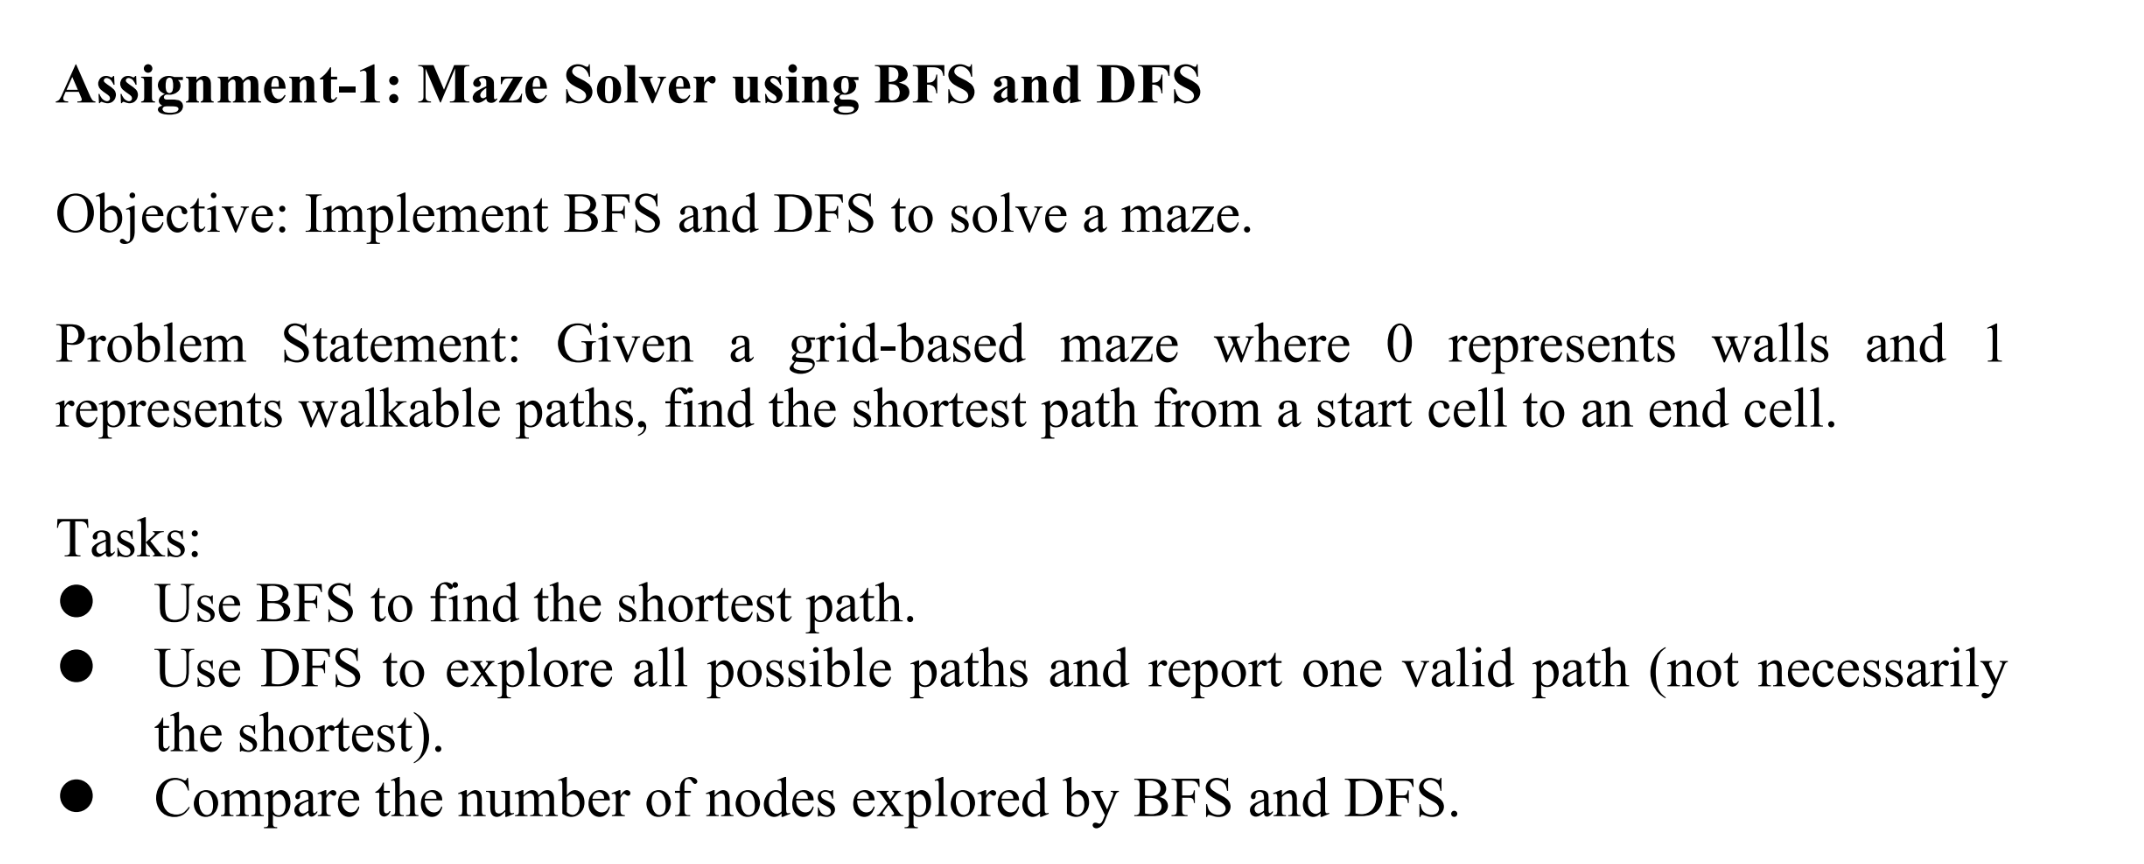

In [4]:
from collections import deque
import numpy as np

def create_maze():
    # Create a sample maze where 0 is wall and 1 is path
    return np.array([
        [1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1],
        [0, 0, 1, 0, 1],
        [1, 1, 1, 0, 1],
        [1, 0, 1, 1, 1]
    ])

    # return np.array([
    # [1, 1, 0],  # Row 0
    # [0, 1, 1]   # Row 1
    # ])



# This conversion allows the existing BFS and DFS code to work with the maze by
# treating it as a graph where each walkable cell is a node and each possible
# move is an edge.


def convert_maze_to_adjacency_matrix(maze):
    rows, cols = maze.shape
    n = rows * cols
    adj_matrix = [[0] * n for _ in range(n)]

    print("inside convert_maze_to_adjacency_matrix")
    # print(adj_matrix)

    # Possible moves
    directions = [(0, 1), # right
                  (1, 0), # down
                  (0, -1), # left
                  (-1, 0) # up
                  ]

    for i in range(rows):
        for j in range(cols):
            if maze[i, j] == 0:  # Skip walls
                continue

            print(f"\n----i: {i}, j:{j}\n")
            current = i * cols + j
            print(f"current: {current}")

            # Check all four directions
            for di, dj in directions:
                print(f"di, dj: {di}, {dj}")
                ni, nj = i + di, j + dj
                print(f"ni, nj: {ni}, {nj}")

                print(f"condn1 (0 <= ni < rows) : {0 <= ni < rows}\ncondn2 (0 <= nj < cols) : {0 <= nj < cols}")
                if (0 <= ni < rows and
                    0 <= nj < cols):
                  print(f"condn3 (maze[ni, nj] == 1): {maze[ni, nj] == 1}")

                if (0 <= ni < rows and
                    0 <= nj < cols and
                    maze[ni, nj] == 1):

                    neighbor = ni * cols + j + dj
                    print(f"neighbour: ni * cols + j + dj: {ni} * {cols} + {j} + {dj} = {neighbor} ")

                    adj_matrix[current][neighbor] = 1
                    adj_matrix[neighbor][current] = 1

    return adj_matrix



def get_path(parent, start, end):
    path = []
    current = end

    # path is appended with the last element (end)
    # then the next current is set to parent of the last element and that is appended
    # then the next current is set to the parent of the parent of the last element and that is appened
    # this continued unti a node has no parent. then the path is reversed and sent back.

    while current is not None:
        path.append(current)
        current = parent[current]


    return path[::-1] # reversed path

def convert_to_2d_coords(node, cols):
    return (node // cols, node % cols)

def bfs_maze(adj, start, end):
    q = deque()
    n = len(adj)
    visited = [False] * n

    print(f"visited: {visited}")
    parent = [None] * n

    print(f"parent: {parent}")
    nodes_explored = 0

    visited[start] = True
    q.append(start)

    print(f"initial queue: {q}")

    while q:
        curr = q.popleft()
        print(f"\nnew node popped from queue\nnode being explored: {curr}\n--------")
        nodes_explored += 1

        print(f"new_visited: {visited}")
        print(f"new_parent: {parent}")
        print(f"new_q: {q}")

        print(f"is curr == end:({curr}=={end}?) : {curr==end}")

        if curr == end:
            return get_path(parent, start, end), nodes_explored

        print(f"now entering for loop from 0 to n-1({n-1})")
        for x in range(n):
            print(f"\n---\nx: {x}, adj[curr({curr})][x({x})]: {adj[curr][x]}, not visited[x]: {not visited[x]} ")
            if adj[curr][x] == 1 and not visited[x]:
                visited[x] = True
                parent[x] = curr
                q.append(x)
            print(f"in for_visited: {visited}")
            print(f"in for_parent: {parent}")
            print(f"in for_q: {q}")
        print("\n----\nfor loop ended. now back to while\n-----\n")

    return None, nodes_explored

def dfs_maze(adj, start, end):
    stack = []
    n = len(adj)

    visited = [False] * n
    parent = [None] * n
    nodes_explored = 0

    visited[start] = True
    stack.append(start)

    while stack:
        curr = stack.pop()
        nodes_explored += 1

        if curr == end:
            return get_path(parent, start, end), nodes_explored

        for x in reversed(range(n)):
            if adj[curr][x] == 1 and not visited[x]:
                visited[x] = True
                parent[x] = curr
                stack.append(x)

    return None, nodes_explored





Maze layout (0=wall, 1=path):
[[1 0 1 1 1]
 [1 1 1 0 1]
 [0 0 1 0 1]
 [1 1 1 0 1]
 [1 0 1 1 1]]
NOW GOING TO CREATE ADJ MATRIX ------------
inside convert_maze_to_adjacency_matrix

----i: 0, j:0

current: 0
di, dj: 0, 1
ni, nj: 0, 1
condn1 (0 <= ni < rows) : True
condn2 (0 <= nj < cols) : True
condn3 (maze[ni, nj] == 1): False
di, dj: 1, 0
ni, nj: 1, 0
condn1 (0 <= ni < rows) : True
condn2 (0 <= nj < cols) : True
condn3 (maze[ni, nj] == 1): True
neighbour: ni * cols + j + dj: 1 * 5 + 0 + 0 = 5 
di, dj: 0, -1
ni, nj: 0, -1
condn1 (0 <= ni < rows) : True
condn2 (0 <= nj < cols) : False
di, dj: -1, 0
ni, nj: -1, 0
condn1 (0 <= ni < rows) : False
condn2 (0 <= nj < cols) : True

----i: 0, j:2

current: 2
di, dj: 0, 1
ni, nj: 0, 3
condn1 (0 <= ni < rows) : True
condn2 (0 <= nj < cols) : True
condn3 (maze[ni, nj] == 1): True
neighbour: ni * cols + j + dj: 0 * 5 + 2 + 1 = 3 
di, dj: 1, 0
ni, nj: 1, 2
condn1 (0 <= ni < rows) : True
condn2 (0 <= nj < cols) : True
condn3 (maze[ni, nj] == 1): True

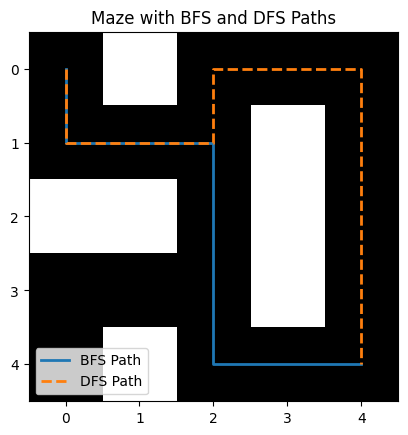

In [5]:
import matplotlib.pyplot as plt

def main():
    # Create maze and convert to adjacency matrix
    maze = create_maze()
    print("Maze layout (0=wall, 1=path):")
    print(maze)

    print("NOW GOING TO CREATE ADJ MATRIX ------------")
    adj_matrix = convert_maze_to_adjacency_matrix(maze)
    rows, cols = maze.shape

    for x in range(len(adj_matrix)):
        print(adj_matrix[x])

    print("ADJ MATRIX CREATED. \n-----\neach walkable cell is a node and each possible move is an edge.\n------------")

    # Define start and end points
    start = 0  # Top-left corner
    end = rows * cols - 1  # Bottom-right corner

    print("Starting BFS -------------")
    # Run BFS
    bfs_path, bfs_nodes = bfs_maze(adj_matrix, start, end)

    print("xxxxxxxxxxxxxxxxx")

    print("\nBFS Results:")
    if bfs_path:
        print("Path found:", [convert_to_2d_coords(x, cols) for x in bfs_path])
    else:
        print("No path found")
    print("Nodes explored:", bfs_nodes)

    # Run DFS
    dfs_path, dfs_nodes = dfs_maze(adj_matrix, start, end)
    print("\nDFS Results:")
    if dfs_path:
        print("Path found:", [convert_to_2d_coords(x, cols) for x in dfs_path])
    else:
        print("No path found")
    print("Nodes explored:", dfs_nodes)

    # Visualization
    fig, ax = plt.subplots()
    # Plot the maze
    ax.imshow(maze, cmap="gray_r")  # Walls are black (0), paths are white (1)
    ax.set_title("Maze with BFS and DFS Paths")

    # Convert BFS and DFS paths to 2D coordinates
    if bfs_path:
        bfs_coords = [convert_to_2d_coords(x, cols) for x in bfs_path]
        bfs_x, bfs_y = zip(*bfs_coords)
        ax.plot(bfs_y, bfs_x, label="BFS Path", linewidth=2)

    if dfs_path:
        dfs_coords = [convert_to_2d_coords(x, cols) for x in dfs_path]
        dfs_x, dfs_y = zip(*dfs_coords)
        ax.plot(dfs_y, dfs_x, label="DFS Path", linewidth=2, linestyle="--")

    # Add legend and display the plot
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()
